# Data Augmentation

Data augmentation은 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법

- Mirroring
- Random Cropping
- Rotation
- Shearing
- Local Warping
- Flipping
- Gray scale
- Saturation (채도)
  - HSV: H(Hue)(색조)
    - S(Saturation): 얼마나 선명한지
    - V(Value): 밝기(Identity)를 나타냄
  - YCbCr 모델
    - RGB 색에서 밝기 성분(Y)과 색차 정보(Cb, Cr)를 분리하여 표현하는 색상 모델
    - 인간의 눈이 밝기 차에는 민감하지만, 색차에는 상대적으로 둔감하다는 점을 이용
    - Y에서 많은 비트 수(해상도)를 할당하고 Cb, Cr에는 낮은 비트 수를 할당하는 방식으로 비디오를 압축
    - YUV 모델로도 불림
- Brightness 
- Center crop

- Color Shifting
  - RGB 에 quite small value 적용

- PCA Color Augmentation
  - R,G,B 의 비율을 보고
  - R,B 의 비율이 크고 G 가 작다면
  - R,B 에 큰 값을 변형하고, G 에는 작은 값을 변형하는 기법

등등 많은 기법들이 있다.

(https://www.youtube.com/watch?v=JI8saFjK84o 참고)

In [1]:
from IPython.display import Image

CPU Thread 에서 distortion

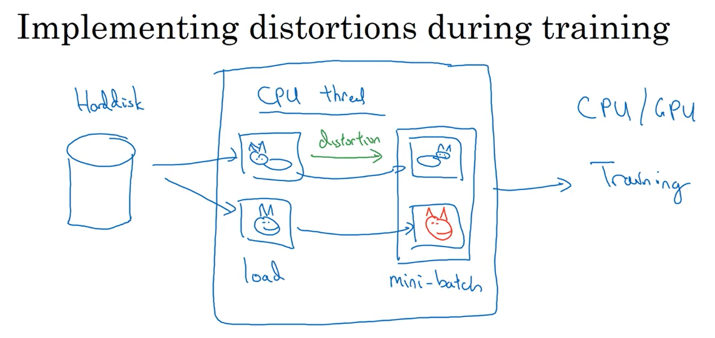

In [2]:
Image(filename='capture/implementing_distortions_during_training.png')

## Sample

In [3]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = './images/mycat.jpg'
sample_img_path

'./images/mycat.jpg'

적절히 리사이징

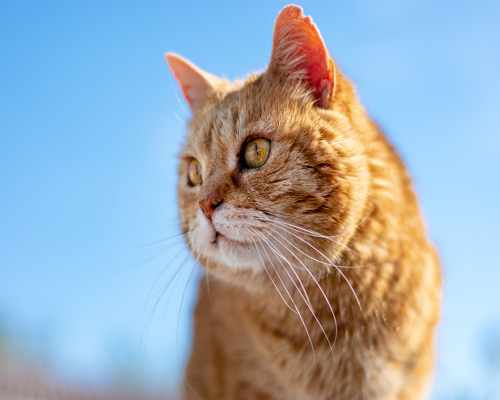

In [4]:
image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip

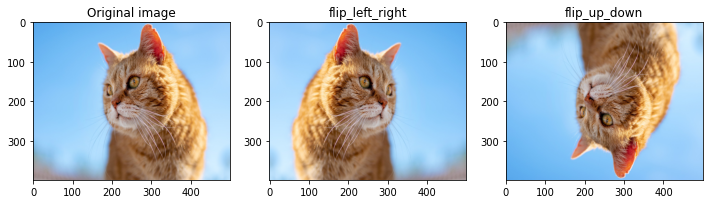

In [5]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

### Random Flip

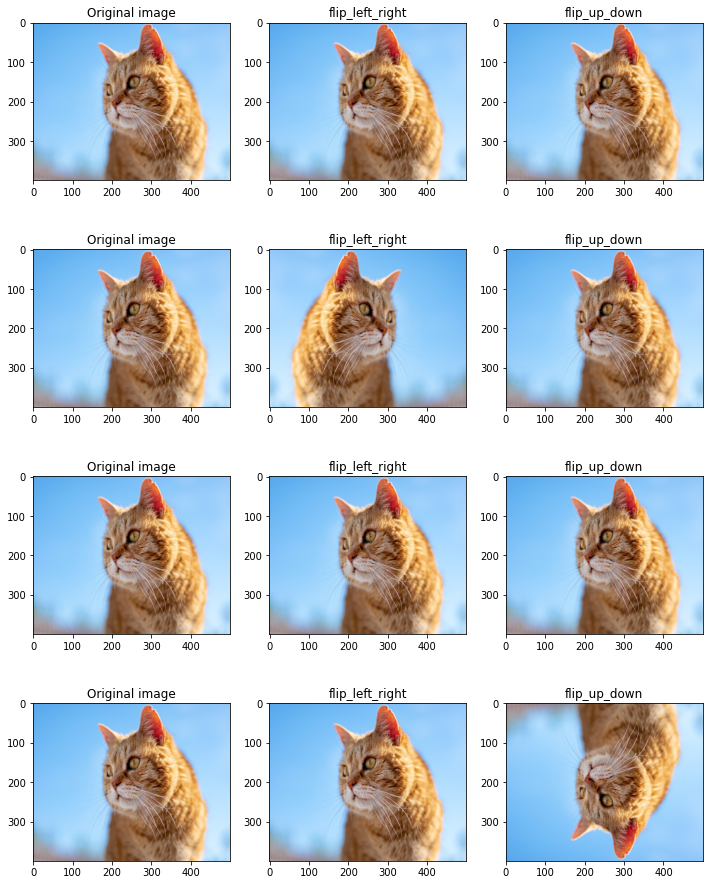

In [7]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

### Center Crop

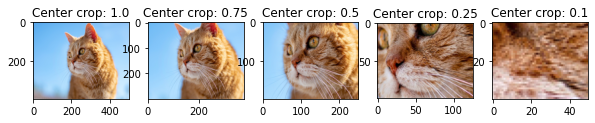

In [8]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

### Random Center Crop

random_center_crop 은 텐서플로우에서 기본적으로 제공하지 않기 때문에 별도 함수를 만들어서 한다.

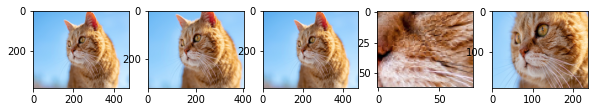

In [9]:
def random_central_crop(image_tensor, range=(0, 1)):
    # range 범위에서 무작위로 잘라낼 비율을 선택합니다
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

plt.figure(figsize=(12, 15))

col = 5
for i in range(col):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

### tr.random.uniform 과 tf.random.normal 의 차이

- tf.random.uniform 함수
  - minval 와 maxval 사이의 균일분포로부터 주어진 형태와 자료형을 갖는 난수 텐서를 반환한다.
  - 균일분포란 최솟값과 최대값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는다는 뜻이다.

- tf.random.normal 함수
  - 정규분포 (normal distribution)로부터 주어진 형태와 자료형을 갖는 난수 텐서를 반환합니다.
  - 정규분포는 가운데가 높고 양극단으로 갈수록 낮아져서 종 모양을 그리는 분포이다.

### tf.image.random_crop

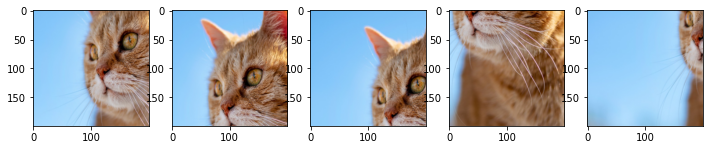

In [11]:
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

### tf.image.random_brightness

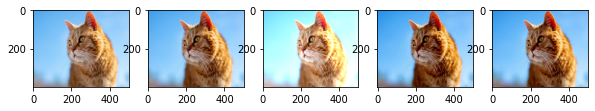

In [12]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=64)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## albumentations 라이브러리

https://albumentations.ai/

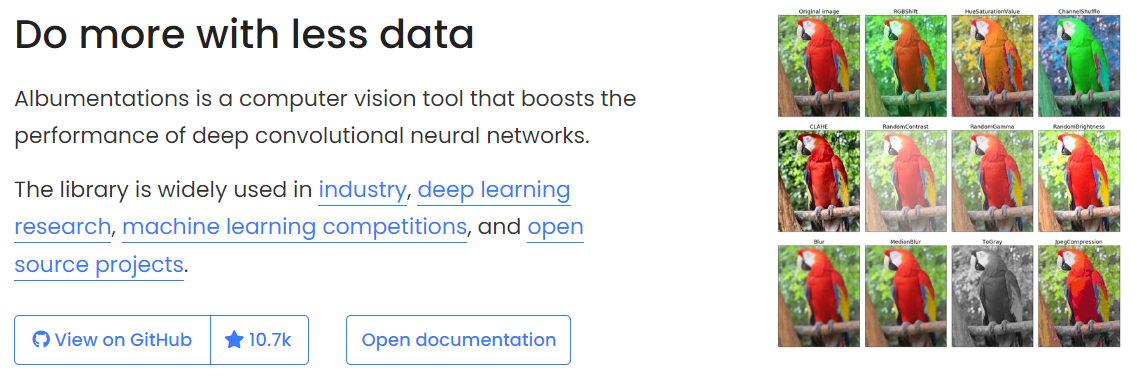

In [14]:
from IPython.display import Image
Image(filename='capture/albumentations.png')

In [15]:
from PIL import Image
import numpy as np

# resize
image = Image.open(sample_img_path).resize((400, 300))
image_arr = np.array(image)
image_arr.shape

(300, 400, 3)

In [58]:
def visualize(image):
    plt.figure(figsize=(10, 5))
    plt.imshow(image)

In [18]:
!pip install albumentations

     -------------------------------------- 116.7/116.7 kB 6.7 MB/s eta 0:00:00
     --------------------------------------- 12.2/12.2 MB 46.7 MB/s eta 0:00:00
  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
  Using cached scipy-1.9.0-cp38-cp38-win_amd64.whl (38.6 MB)
     --------------------------------------- 35.5/35.5 MB 32.7 MB/s eta 0:00:00
  Using cached scikit_learn-1.1.2-cp38-cp38-win_amd64.whl (7.3 MB)
     ---------------------------------------- 3.4/3.4 MB 54.1 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 42.8 MB/s eta 0:00:00
     ---------------------------------------- 208.5/208.5 kB ? eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 44.2 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


### transforms.Affine()

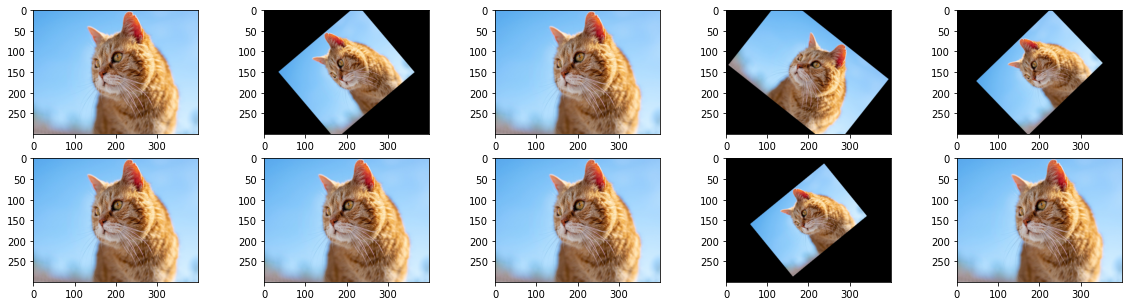

In [43]:
import albumentations as A

plt.figure(figsize=(20, 5))

for i in range(10):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    plt.subplot(2, 5, i+1)
    plt.imshow((transformed['image']))

### transforms.RandomCrop

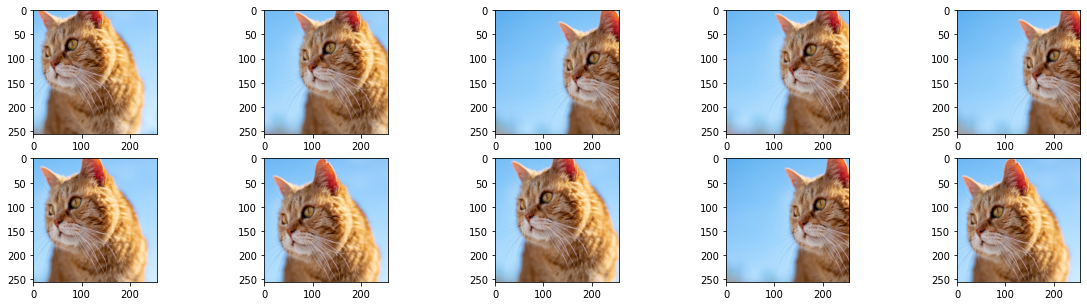

In [47]:
import albumentations as A

plt.figure(figsize=(20, 5))

for i in range(10):
    transform = A.Compose([
        A.RandomCrop(width=256, height=256)
    ])
    transformed = transform(image=image_arr)
    plt.subplot(2, 5, i+1)
    plt.imshow((transformed['image']))

### MedianBlur

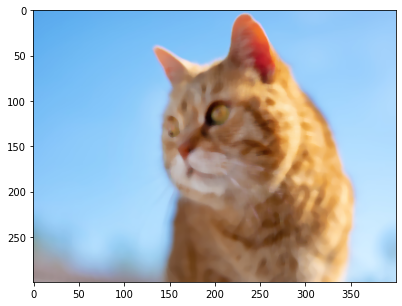

In [62]:
transform = A.Compose(
    [A.MedianBlur(blur_limit=9, always_apply=False, p=0.5)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

### ToGray, MultiplicativeNoise

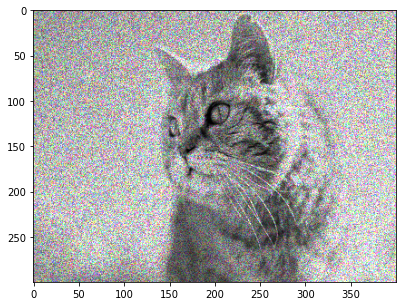

In [63]:
transform = A.Compose(
    [A.ToGray(p=1),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

### Gray 색상의 노이즈가 있는 RandomCrop()을 사용하여 고양이 이미지 100장을 시각화

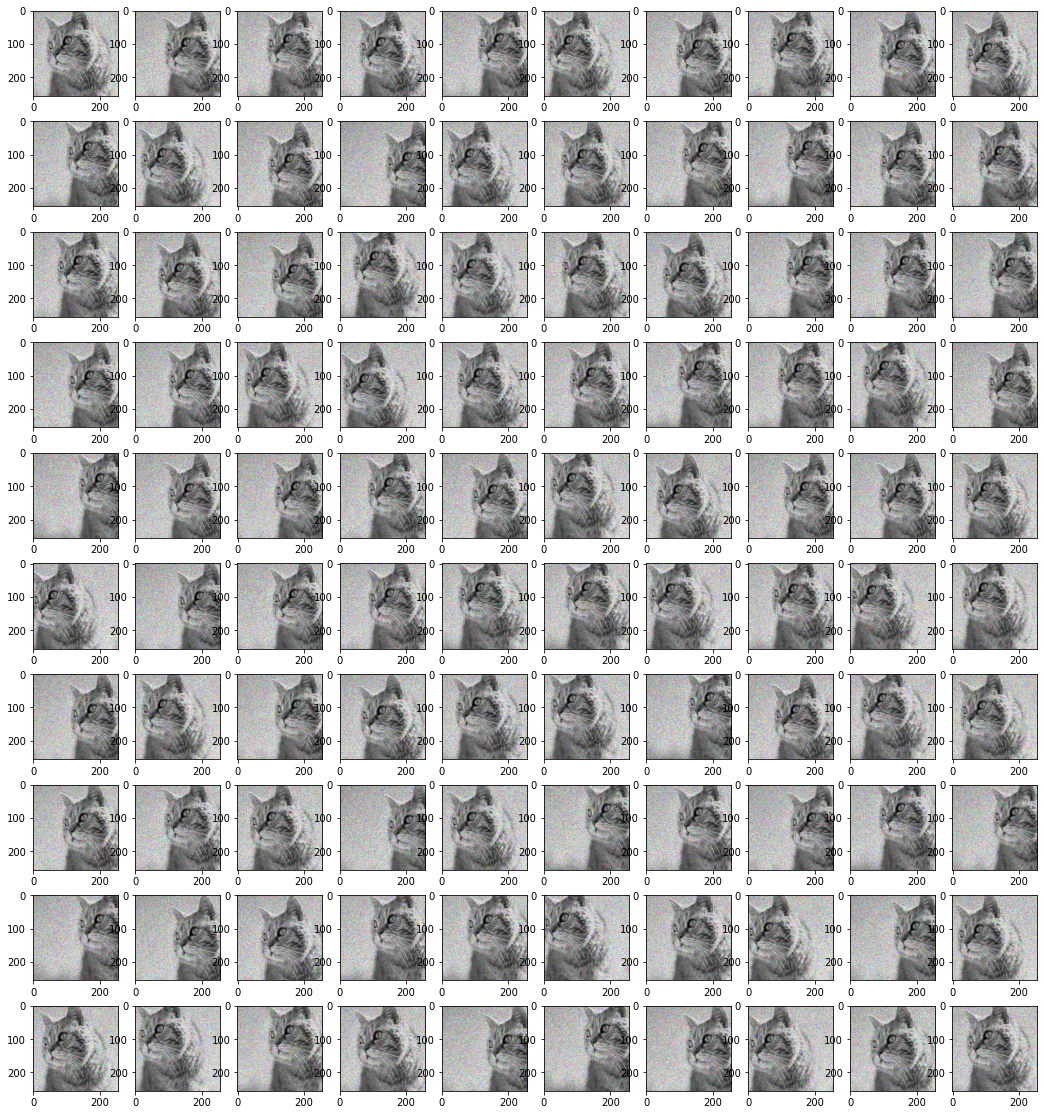

In [64]:
def transform_data(img_arr):
    transform = A.Compose(
        [A.ToGray(p=1),
         A.MultiplicativeNoise(multiplier=[0.5, 1.5], 
                               elementwise=True, per_channel=True, p=1),
         A.RandomCrop(width=256, height=256)]
    )
    t_image = transform(image=img_arr)
    t_image = t_image['image']
    return t_image

plt.figure(figsize=(18,20))
for i in range(100):
    image = transform_data(image_arr)
    plt.subplot(10,10,i+1)
    plt.imshow(image)